In [1]:
# generic imports
import sys
import os

# numerics imports
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.vq import kmeans

# visualization imports
import matplotlib as mpl
from matplotlib import cm

In [2]:
# TM imports
sys.path.insert(0,'../..')
import tram.system as gs
import tram.kernels as krnls
import tram.transition_manifold as tm
import potential

In [3]:
# setting up the system
domain = np.array([[-1.5, -0.5], [1.5, 2.5]])
beta = 0.1 # inverse energy
mypotential = potential.Potential()
system = gs.GradientSystem(mypotential, domain, beta)

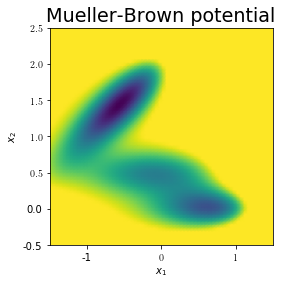

In [4]:
# visualize the potential
nPotpoints = 64
xpot = system.generateTestpoints(nPotpoints, 'grid')

V = system.pot(xpot)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.pcolormesh( xpot[:,0].reshape(nPotpoints, -1), xpot[:,1].reshape(nPotpoints, -1), V.reshape(nPotpoints,-1), cmap='viridis', vmax=10, shading='gouraud')

plt.rc('text', usetex=True)
font = {'family' : 'serif',
        'size'   : 16}
plt.rc('font', **font)
fig.set_size_inches(4,4)
ax.set_title(r'Mueller-Brown potential')
ax.set_xlabel(r'$x_1$')
ax.set_ylabel(r'$x_2$')

plt.show()

In [5]:
# generate dynamical data
nTestpoints = 32
xtest = system.generateTestpoints(nTestpoints, 'grid')

t0 = 0
t = 0.01
dt = 0.00001
M = 100

X = system.generatePointclouds(t, dt, xtest, M)

In [6]:
# compute reaction coordinate using the kernel embedding
kernel = krnls.GaussianKernel(1)
epsi_diffmap = 1
kerTM = tm.KernelBurstTransitionManifold(kernel, epsi_diffmap)
kerTM.fit(X)

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)

# visualize RC
pcol = ax.pcolormesh( xtest[:,0].reshape(nTestpoints, -1),
             xtest[:,1].reshape(nTestpoints, -1),
             np.real(kerTM.rc[1][:,1].reshape(nTestpoints,-1)),
             shading='flat',
             )
clb = fig.colorbar(pcol)
clb.ax.set_title(r'$\xi$')

plt.rc('text', usetex=True)
font = {'family' : 'serif',
        'size'   : 16}
plt.rc('font', **font)
fig.set_size_inches(4,4)
ax.set_title(r'kernel RC')
ax.set_xlabel(r'$x_1$')
ax.set_ylabel(r'$x_2$')
plt.show()

In [ ]:
# compute reaction coordinate using the Whitney embedding
embfun=tm.RandomLinearEmbeddingFunction(2,3,2)
epsi_diffmap = 1
embTM=tm.EmbeddingBurstTransitionManifold(embfun,epsi_diffmap)
embTM.fit(X)

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)

# visualize RC
pcol = ax.pcolormesh( xtest[:,0].reshape(nTestpoints, -1),
             xtest[:,1].reshape(nTestpoints, -1),
             np.real(embTM.rc[1][:,1].reshape(nTestpoints,-1)),
             shading='flat',
             )
clb = fig.colorbar(pcol)
clb.ax.set_title(r'$\xi$')

plt.rc('text', usetex=True)
font = {'family' : 'serif',
        'size'   : 16}
plt.rc('font', **font)
fig.set_size_inches(4,4)
ax.set_title(r'Whitney RC')
ax.set_xlabel(r'$x_1$')
ax.set_ylabel(r'$x_2$')
plt.show()

In [7]:
# generate single long trajectory
T = 100
r0 = system.generateTestpoints(1,'uniform')
r = system.generateTrajectory(T,dt*100,r0)

Generating trajectory...


100%|██████████| 100000/100000 [00:20<00:00, 4881.41it/s]


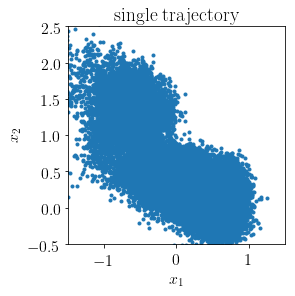

In [8]:
fig = plt.figure()
ax = fig.add_subplot(111)

# visualize trajectory
plt.plot(r[:,0], r[:,1], '.')
plt.gca().set_aspect('equal', adjustable='box')

ax.set_xlim(-1.5,1.5)
ax.set_ylim(-0.5,2.5)

ax.set_title(r'single trajectory')
ax.set_xlabel(r'$x_1$')
ax.set_ylabel(r'$x_2$')
plt.show()

In [9]:
# select evaluation points
xkmeans = kmeans(r,250)[0]

In [12]:
trajTM = tm.KernelTrajTransitionManifold(kernel,1)
trajTM.fit(r,xkmeans,1)

Sorting into Voronoi cells...
Assigning trajectory points to centers...


100%|██████████| 250/250 [00:02<00:00, 95.67it/s]

Computing symmetric kernel evaluations...



100%|██████████| 250/250 [00:00<00:00, 855.47it/s]

Computing asymmetric kernel evaluations...



100%|██████████| 250/250 [00:29<00:00,  3.54it/s]


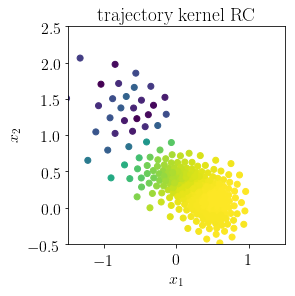

In [13]:
fig = plt.figure()
ax = fig.add_subplot(111)

# visualize RC
transformed = trajTM.predict(n_components=2)
plt.scatter(xkmeans[:,0],xkmeans[:,1],c=transformed[:, 1])
plt.gca().set_aspect('equal', adjustable='box')

ax.set_xlim(-1.5,1.5)
ax.set_ylim(-0.5,2.5)

ax.set_title(r'trajectory kernel RC')
ax.set_xlabel(r'$x_1$')
ax.set_ylabel(r'$x_2$')
plt.show()

In [ ]:
trajTM.rc